In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#sns.set_theme()
#sns.set_context('paper')

%matplotlib inline

In [2]:
def parse_dump(dump):
    ts = dump.get('ts')
    # z0_orig = dump.get('z0_orig')
    true_zt = dump.get('true_zt')
    true_zt_chaos = dump.get('true_zt_chaos')
    pred_zt = dump.get('pred_zt')
    var_zt = dump.get('var_zt')

    return ts, true_zt, true_zt_chaos, pred_zt, var_zt

In [3]:
def trace_plot(t, y, ax, y_std=None, kind='region', color='black', min_y=-np.inf, max_y=np.inf):
    '''
    Arguments:
        zt: Assumes zeroth dimension is number of samples.
        ax: Matplotlib Axis
        pos: Positive quantity flag (for range bounds)
    '''
    assert kind in ['region', 'bound']

    mu = np.mean(y, axis=0)
    if y_std is None:
        std = np.std(y, axis=0)
    else:
        std = y_std
        
    ax.plot(t, mu, c=color)

    if y.shape[0] == 1:
        return

    lower = np.clip(mu - 2. * std, min_y, max_y)
    upper = np.clip(mu + 2. * std, min_y, max_y)

    if kind == 'region':
        ax.fill_between(ts, lower, upper, color=color, alpha=0.3)
    elif kind == 'bound':
        ax.plot(np.array([t, t]).T, np.array([lower, upper]).T, c=color, dashes=[6,2])
    else:
        raise NotImplementedError

def make_plot(dump_path):
    dump = torch.load(dump_path)
    ts, true_zt, true_zt_chaos, pred_zt, var_zt = parse_dump(dump)
    
    for b in range(2):
        for dim in range(2):
            fig, ax = plt.subplots()
            trace_plot(ts, true_zt[0,:,0,b,dim].unsqueeze(0).numpy(), ax, color=(.2,.2,.2))
        #     trace_plot(ts, true_zt_chaos[0,:,:,0,0,0].numpy(), ax, color=(.5,.5,.5))
            trace_plot(ts, pred_zt[:,0,:,0,b,dim].numpy(), ax, 
                           var_zt[0,:,0,b,dim].detach().numpy(), color='red')
            
            print(var_zt[0,:,0,b,dim].detach().numpy())
            plt.show()
            plt.close()

[7.20109306e-09 7.55326202e-09 8.12933543e-09 8.87289975e-09
 9.69850600e-09 1.05023785e-08 1.11789982e-08 1.16376526e-08
 1.18146977e-08 1.16821974e-08 1.12520731e-08 1.05759108e-08
 9.74123893e-09 8.86320795e-09 8.06988876e-09 7.48092877e-09
 7.18802928e-09 7.24698968e-09 7.68388020e-09 8.53008775e-09
 9.94290250e-09 1.24824266e-08 1.75797901e-08 2.81508896e-08
 4.85017857e-08 8.14961467e-08 1.25302947e-07 1.74598014e-07
 2.23347485e-07 2.65845017e-07 2.97539856e-07 3.15703602e-07
 3.19501169e-07 3.09712220e-07 2.88330540e-07 2.58117410e-07
 2.22111666e-07 1.83278573e-07 1.44524350e-07 1.08837789e-07
 7.88286414e-08 5.57744428e-08 3.93355180e-08 2.82082393e-08
 2.08980691e-08 1.61438809e-08 1.30356907e-08 1.09750999e-08
 9.59515489e-09 8.68183658e-09 8.10723932e-09 7.78822873e-09
 7.66938513e-09 7.71171837e-09 7.87914711e-09 8.12916490e-09
 8.41387404e-09 8.68677308e-09 8.90878304e-09 9.05075037e-09
 9.09451359e-09 9.03326303e-09 8.87195206e-09 8.62719851e-09
 8.32659452e-09 8.006859

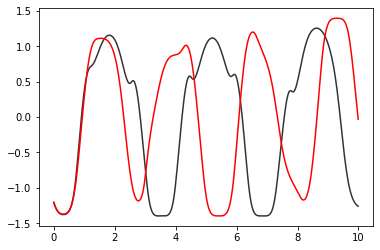

[7.76839713e-08 9.98767007e-08 1.26460591e-07 1.56689651e-07
 1.88762058e-07 2.19817707e-07 2.46265643e-07 2.64444679e-07
 2.71477717e-07 2.66045902e-07 2.48781731e-07 2.22127341e-07
 1.89708800e-07 1.55466580e-07 1.22828524e-07 9.41169063e-08
 7.03400218e-08 5.14244753e-08 3.67284976e-08 2.56553498e-08
 1.80888424e-08 1.38595704e-08 1.22729054e-08 1.27431949e-08
 1.47648933e-08 1.77146955e-08 2.09588258e-08 2.39101308e-08
 2.62293067e-08 2.78408638e-08 2.87834752e-08 2.91172686e-08
 2.89004856e-08 2.81896835e-08 2.70470029e-08 2.55483581e-08
 2.37884041e-08 2.18774421e-08 1.99292902e-08 1.80461797e-08
 1.63191380e-08 1.48533319e-08 1.37922989e-08 1.33105820e-08
 1.35785729e-08 1.47125769e-08 1.67567489e-08 1.97535783e-08
 2.38338203e-08 2.92529805e-08 3.63925245e-08 4.56283438e-08
 5.71086431e-08 7.06491363e-08 8.57518145e-08 1.01626533e-07
 1.17217212e-07 1.31302215e-07 1.42652041e-07 1.50210326e-07
 1.53260046e-07 1.51545891e-07 1.45315298e-07 1.35266987e-07
 1.22422492e-07 1.079559

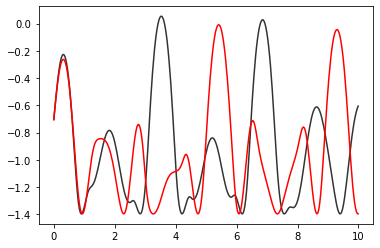

[1.72500525e-09 1.88575444e-09 2.05852912e-09 2.22707874e-09
 2.37757369e-09 2.50030685e-09 2.58988031e-09 2.64392463e-09
 2.66157296e-09 2.64229127e-09 2.58547272e-09 2.49066834e-09
 2.35880560e-09 2.19428342e-09 2.00736006e-09 1.81552662e-09
 1.64254599e-09 1.51402724e-09 1.45249746e-09 1.48282731e-09
 1.65180780e-09 2.07040496e-09 3.03962322e-09 5.33270095e-09
 1.05072475e-08 2.06462882e-08 3.72355835e-08 5.96789249e-08
 8.47128589e-08 1.07692763e-07 1.24746848e-07 1.33793506e-07
 1.34365209e-07 1.27166146e-07 1.13767264e-07 9.63513997e-08
 7.73228308e-08 5.88125530e-08 4.23800834e-08 2.90020896e-08
 1.90518428e-08 1.22420909e-08 7.84937271e-09 5.10922327e-09
 3.43260487e-09 2.42294140e-09 1.82636994e-09 1.48342993e-09
 1.29789446e-09 1.21427857e-09 1.19975418e-09 1.23343602e-09
 1.30113398e-09 1.39217193e-09 1.49694790e-09 1.60559233e-09
 1.70833592e-09 1.79691650e-09 1.86548488e-09 1.91049221e-09
 1.93008365e-09 1.92359351e-09 1.89133065e-09 1.83475668e-09
 1.75695902e-09 1.663163

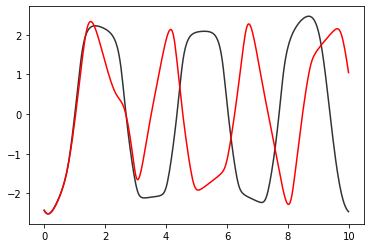

[1.72643464e-08 1.93186001e-08 2.17868283e-08 2.45763658e-08
 2.74936856e-08 3.02620968e-08 3.25677121e-08 3.41181732e-08
 3.46989744e-08 3.42157946e-08 3.27137677e-08 3.03726040e-08
 2.74764389e-08 2.43618672e-08 2.13514220e-08 1.86886915e-08
 1.64976832e-08 1.47703583e-08 1.33854057e-08 1.22645982e-08
 1.16364980e-08 1.20710908e-08 1.46422261e-08 2.20404939e-08
 3.93379977e-08 7.23056388e-08 1.22487776e-07 1.84283920e-07
 2.47923424e-07 3.03384581e-07 3.43091671e-07 3.63084098e-07
 3.62815143e-07 3.44382897e-07 3.11707907e-07 2.69668362e-07
 2.23153307e-07 1.76359507e-07 1.32743835e-07 9.52617540e-08
 6.59403412e-08 4.50413147e-08 3.11930783e-08 2.24404211e-08
 1.70725212e-08 1.38796228e-08 1.20984742e-08 1.12676872e-08
 1.10958966e-08 1.13883578e-08 1.20186199e-08 1.29089592e-08
 1.40179965e-08 1.53288902e-08 1.68192535e-08 1.84272224e-08
 2.00428119e-08 2.15271747e-08 2.27398722e-08 2.35624835e-08
 2.39158329e-08 2.37700792e-08 2.31487380e-08 2.21253220e-08
 2.08135784e-08 1.934953

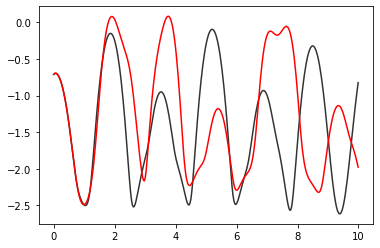

In [4]:
make_plot("../../data.pt")